In [84]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import patsy

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
Engineer new features for the Areas

In [138]:
df = pd.read_csv('./housing.csv')

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
df = df.drop('Id', axis=1) #Dropped the Id column

In [88]:
df = df[df.GrLivArea < 4000] #Drop all outliers as per the author's instructions

In [156]:
df[['OverallQual', 'OverallCond']].corr()

,OverallQual,OverallCond
OverallQual,1.000000,-0.091932
OverallCond,-0.091932,1.000000


In [89]:
df = df[df.MSZoning != 'C (all)'] #Drop all commercial values

In [90]:
df.columns[df.isnull().sum() > 0]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [109]:
df.Electrical.value_counts()

SBrkr    1324
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [91]:
df[df.columns[df.isnull().sum() > 0]]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [92]:
#Lot Frontage is actual missing values
#1365 houses have no alley access
#MasVnrType + MasVnrArea - Actual missing records for masonry type
#37 houses have no basement and 1 more record has missing information for bsmtexposure+bsmntfin
#Electrical has 1 missing value
#690 houses have no fireplace
#81 houses have no garage
#1451 houses have no pool
#1176 houses have no fence
#1402 houses have no miscellaneous features - so get rid of MiscVal as well.

In [93]:
# Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
#        u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
#        u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
#        u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
#        u'MiscFeature'],

For the missing columns with categorical type relating to Alley, Basement, Garage, Fireplace, Fence, Pool and Miscellaneous Features as per the data description file indicate that these houses are missing these features or can be categorized as having "No Feature" and for the numeric features corresponding to these particular features, like GarageArea, the correct value of 0 is already reflected in the columns and does not reflect in the missing values.

As such, we can proceed to fill all these particular NA values with a string "No Feature" which will be perfectly usable for categorical transformation for later use in our modelling.

In [94]:
df['BsmtCond'].value_counts()

TA    1299
Gd      65
Fa      43
Po       2
Name: BsmtCond, dtype: int64

In [95]:
df['BsmtExposure'].value_counts()

No    947
Av    218
Gd    131
Mn    112
Name: BsmtExposure, dtype: int64

In [96]:
1083./(1406-79)

0.8161266013564431

In [129]:
#df.MSSubClass = df.MSSubClass.map(lambda x: "OneStory1946" if x == 20 else "OneStory1945" if x == 30 else "OneStory" if x == 40)
df.MSSubClass.head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [154]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [153]:
df[df["SaleCondition" == "Normal"]]

KeyError: False

In [139]:
remap = {20:'OneStory1946New', 30:'OneStory1945Old', 40:'OneStory', 45:'OneHalfStoryUF',
         50:'OneHalfStoryF', 60:'TwoStory1946New', 70:'TwoStory1945Old', 75:'TwoHalfStory',
         80:'SplitMultiLevel', 85:'SplitFoyer', 90:'Duplex', 120:'OneStoryPUD1946New',
         150:'OneHalfStoryPUD', 160:'TwoStoryPUD1946New', 180:'PUDMultiLevel', 190:'TwoFamConv'}

In [140]:
df.MSSubClass.replace(remap, inplace=True)

In [142]:
df.MSSubClass.value_counts()

OneStory1946New       536
TwoStory1946New       299
OneHalfStoryF         144
OneStoryPUD1946New     87
OneStory1945Old        69
TwoStoryPUD1946New     63
TwoStory1945Old        60
SplitMultiLevel        58
Duplex                 52
TwoFamConv             30
SplitFoyer             20
TwoHalfStory           16
OneHalfStoryUF         12
PUDMultiLevel          10
OneStory                4
Name: MSSubClass, dtype: int64

In [ ]:
 20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [117]:
df.MSSubClass = [x = "OneStorey" if x == 20 for x in df.MSSubClass]

SyntaxError: invalid syntax (<ipython-input-117-6e35368d64bd>, line 1)

In [100]:
counter = 0
for x in df[~df.GarageYrBlt.isnull()][['GarageYrBlt','YearBuilt']].values:
    if x[0] == x[1]:
        counter += 1
print counter

1083


In [99]:
df[df.GarageYrBlt.isnull()][['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
39,NaN,1955
48,NaN,1920
78,NaN,1968
89,NaN,1994
99,NaN,1959
108,NaN,1919
125,NaN,1935
127,NaN,1930
140,NaN,1971
148,NaN,2004


In [103]:
df.loc[df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df[df['GarageYrBlt'].isnull()]['YearBuilt']b

In [112]:
df.OverallCond

0       5
1       8
2       5
3       5
4       5
5       5
6       5
7       6
8       5
9       6
10      5
11      5
12      6
13      5
14      5
15      8
16      7
17      5
18      5
19      6
20      5
21      7
22      5
23      7
24      8
25      5
26      7
27      5
28      6
29      6
       ..
1430    5
1431    6
1432    6
1433    5
1434    5
1435    9
1436    6
1437    5
1438    7
1439    6
1440    7
1441    5
1442    5
1443    6
1444    5
1445    5
1446    7
1447    5
1448    7
1449    7
1450    5
1451    5
1452    5
1453    5
1454    5
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, dtype: int64

In [105]:
df[['GarageYrBlt','YearBuilt']][30:100]

,GarageYrBlt,YearBuilt
31,1966.0,1966
32,2007.0,2007
33,1959.0,1959
34,2005.0,2005
35,2004.0,2004
36,1995.0,1994
37,1954.0,1954
38,1953.0,1953
39,1955.0,1955
40,1965.0,1965


In [66]:
df.head().T

,0,1,2,3,4
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [36]:
df.loc[(df['GarageYrBlt'] == 'unknown'), 'GarageYrBlt'] = np.mean()

In [38]:
df.GarageYrBlt.value_counts()

unknown    79
2005.0     65
2006.0     59
2004.0     53
2003.0     50
2007.0     48
1977.0     35
1998.0     31
1999.0     30
1976.0     29
2008.0     28
2000.0     27
2002.0     26
1968.0     26
1950.0     24
1993.0     22
2009.0     21
1965.0     21
1966.0     21
1962.0     21
2001.0     20
1957.0     20
1958.0     20
1970.0     20
1960.0     19
1954.0     19
1997.0     19
1996.0     19
1978.0     19
1974.0     18
           ..
1926.0      6
1916.0      5
1922.0      5
1936.0      5
1935.0      4
1931.0      4
1982.0      4
1945.0      4
1946.0      4
1928.0      4
1921.0      3
1923.0      3
1924.0      3
1910.0      3
2010.0      3
1932.0      3
1938.0      3
1929.0      2
1934.0      2
1937.0      2
1918.0      2
1942.0      2
1915.0      2
1914.0      2
1947.0      2
1952.0      2
1927.0      1
1933.0      1
1908.0      1
1906.0      1
Name: GarageYrBlt, dtype: int64

In [37]:
df[df.GarageYrBlt.isnull()][['GarageYrBlt', 'YearBuilt','YearRemodAdd']]

,GarageYrBlt,YearBuilt,YearRemodAdd


In [34]:
df.fillna(df.mean())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,69.693345,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [17]:
df[df.GarageYrBlt.isnull()][['GarageYrBlt', 'YearBuilt','YearRemodAdd']].fillna(np.mean(df.YearBuilt))

,GarageYrBlt,YearBuilt,YearRemodAdd
39,1971.511065,1955,1955
48,1971.511065,1920,2008
78,1971.511065,1968,1968
89,1971.511065,1994,1995
99,1971.511065,1959,1959
108,1971.511065,1919,2005
125,1971.511065,1935,1982
127,1971.511065,1930,1950
140,1971.511065,1971,1971
148,1971.511065,2004,2005


In [20]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1441
MiscFeature      1394
Alley            1357
Fence            1169
FireplaceQu       681
LotFrontage       259
GarageType         79
GarageCond         79
GarageFinish       79
GarageQual         79
GarageYrBlt        79
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

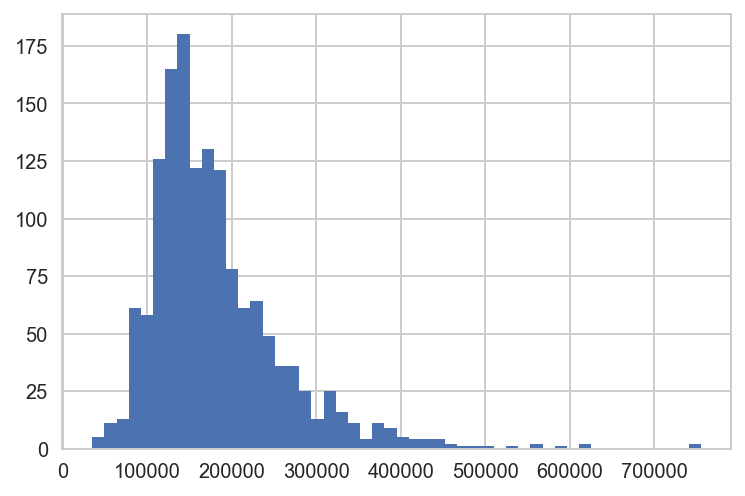

In [146]:
df.SalePrice.hist(bins=50)